In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('threads_reviews.csv')
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [ ]:
import datetime
df['review_date']=pd.to_datetime(df['review_date'])

In [ ]:
df['Date']=df['review_date'].dt.date

In [ ]:
df.head()

,source,review_description,rating,review_date,Date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,2023-07-08
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,2023-07-19
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,2023-07-06
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,2023-07-10
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,2023-07-06


In [ ]:
df=df.drop(['review_date'],axis=1)

In [ ]:
df.head()

,source,review_description,rating,Date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.dtypes

source                object
review_description    object
rating                 int64
Date                  object
dtype: object

In [ ]:
df.isna().sum()

source                0
review_description    0
rating                0
Date                  0
dtype: int64

**DATA VISUALIZATION**

In [ ]:
df['source'].value_counts()

Google Play    30270
App Store       2640
Name: source, dtype: int64

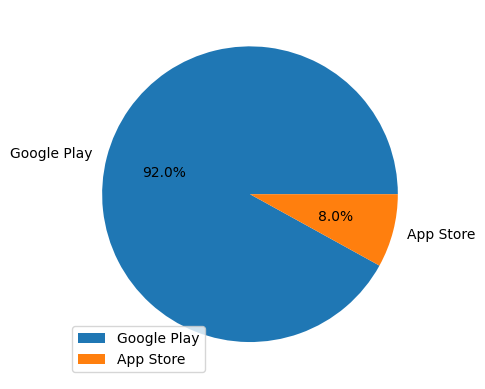

In [ ]:
#checking for source through pie chart
y=df['source'].value_counts()
lab=['Google Play','App Store']
plt.pie(y,labels=lab,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

<Axes: xlabel='source', ylabel='count'>

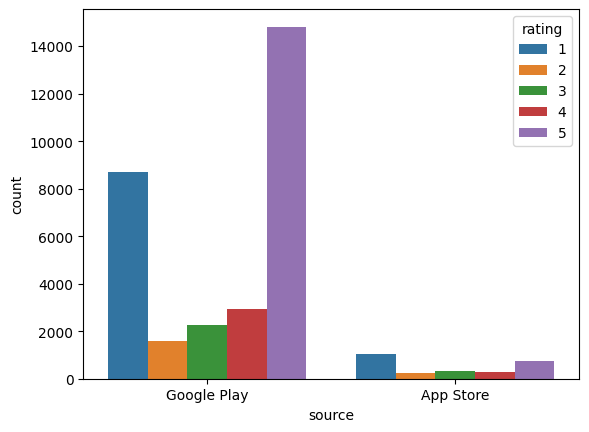

In [ ]:
sns.countplot(x='source',data=df,hue='rating')

<Axes: xlabel='rating', ylabel='Count'>

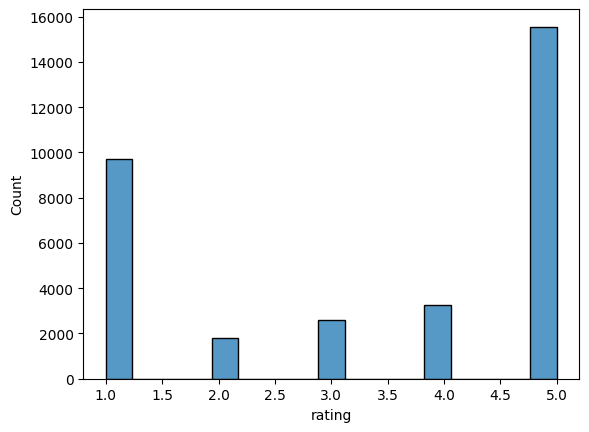

In [ ]:
sns.histplot(x='rating',data=df)

In [ ]:
#1,2:-negative || 3:-neutral || 4,5:-posetive
df['rating']=df['rating'].map({1:-1,2:-1,3:0,4:1,5:1})

In [ ]:
df.head()

,source,review_description,rating,Date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,-1,2023-07-08
1,Google Play,Pretty good for a first launch!! Its easy to u...,0,2023-07-19
2,Google Play,"For a brand new app, it's very well optimized....",0,2023-07-06
3,Google Play,"Great app with a lot of potential! However, th...",0,2023-07-10
4,Google Play,"The app is good, but it needs a lot of functio...",0,2023-07-06


In [ ]:
out=df['rating']
inp=df['review_description']

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

**removing special charecter,tokenizer,proter stemming**

In [ ]:
from nltk.corpus import stopwords
st=stopwords.words('english')
ps=PorterStemmer
inp=inp.str.replace('[^a-zA-Z0-9]+'," ")
inp=inp.apply(lambda x:[i for i in word_tokenize(x) if i.lower() not in st]).apply(lambda y: " ".join(y))
inp=inp.apply(lambda x:[i for i in word_tokenize(x) if len(i)>2]).apply(lambda y:" ".join(y))


In [ ]:
inp.head(5)

0    Meh greatest experience Chromebook Seems custo...
1    Pretty good first launch easy use self explana...
2    brand new app well optimized However missing q...
3    Great app lot potential However lot needs fixe...
4    app good needs lot functionality example searc...
Name: review_description, dtype: object

**Tfid Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
vec_inp=tfid.fit_transform(inp)
print(vec_inp)

  (0, 6764)	0.17134832940798864
  (0, 5243)	0.09621475229642192
  (0, 8633)	0.1003839991628843
  (0, 15195)	0.09823645460703452
  (0, 5980)	0.08643814937980626
  (0, 991)	0.17385131986048655
  (0, 5458)	0.21414499501196252
  (0, 3159)	0.14547272469365652
  (0, 13351)	0.19582117460074044
  (0, 14564)	0.19582117460074044
  (0, 1703)	0.17134832940798864
  (0, 12912)	0.10702492765785153
  (0, 3843)	0.15869925486288608
  (0, 2655)	0.15933415973092566
  (0, 3086)	0.21414499501196252
  (0, 8301)	0.14083010843769567
  (0, 11711)	0.21414499501196252
  (0, 7887)	0.10543876518722689
  (0, 934)	0.04567712850382636
  (0, 4770)	0.11381031794434707
  (0, 4980)	0.13869798733272892
  (0, 7527)	0.20603657530897776
  (0, 9414)	0.21414499501196252
  (0, 2987)	0.14899015521235023
  (0, 11401)	0.16285159024961934
  :	:
  (32904, 2439)	0.37489790636139586
  (32904, 10097)	0.30764970026604577
  (32904, 14360)	0.33724603820225324
  (32905, 13210)	0.38546710108519616
  (32905, 15712)	0.3524837015230212
  (32905

**Train-Test split**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(vec_inp,out,test_size=0.2,random_state=1)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
scores={}
sv.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=sv.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.74      0.76      2317
           0       0.40      0.02      0.04       532
           1       0.80      0.93      0.86      3733

    accuracy                           0.79      6582
   macro avg       0.66      0.56      0.55      6582
weighted avg       0.76      0.79      0.76      6582



In [ ]:
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.74      0.76      2317
           0       0.40      0.02      0.04       532
           1       0.80      0.93      0.86      3733

    accuracy                           0.79      6582
   macro avg       0.66      0.56      0.55      6582
weighted avg       0.76      0.79      0.76      6582



In [ ]:
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.74      0.76      2317
           0       0.40      0.02      0.04       532
           1       0.80      0.93      0.86      3733

    accuracy                           0.79      6582
   macro avg       0.66      0.56      0.55      6582
weighted avg       0.76      0.79      0.76      6582



In [ ]:
val=rf.predict(tfid.transform(["Threads falls short due to its relentlessly grim and harrowing portrayal of a post-apocalyptic world, leaving audiences emotionally drained and overwhelmed"]))
if val==-1:
  print("Negative")
if val==0:
  print("Neutral")
if val==1:
  print("positive")

Negative


In [ ]:
val=rf.predict(tfid.transform(["its a good day"]))
if val==-1:
  print("Negative")
if val==0:
  print("Neutral")
if val==1:
  print("positive")

positive


In [ ]:
val=rf.predict(tfid.transform(["although AI is good but replace many people job"]))
if val==-1:
  print("Negative")
if val==0:
  print("Neutral")
if val==1:
  print("positive")

positive
